[Fashion MNIST & IRIS ] 모델 구현

- 커스텀 데이터셋 생성

- 커스텀 모델 생성

- 학습/테스트 함수 생성

- 학습목표: iris 품종 분류
- 학습알고리즘: 지도학습 >> 분류 >> 다중분류 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchmetrics.classification import F1Score
from torchinfo import summary

from torch.utils.data import Dataset, DataLoader

import pandas as pd
from sklearn.preprocessing import OneHotEncoder	

#### [1] 데이터 로드 & 타겟 변수 인코딩 & 피쳐/타겟 분리

In [2]:
DATA_FILE = r'C:\Users\KDP-43\Desktop\머신러닝_1\data\iris.csv'

irisDF = pd.read_csv(DATA_FILE)
irisDF.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [3]:
# 피쳐 & 타겟
featureDF = irisDF[irisDF.columns[:-1]]
targetDF = irisDF[[irisDF.columns[-1]]]

print(f'featureDF => {featureDF.shape}, targetDF => {targetDF.shape}')

featureDF => (150, 4), targetDF => (150, 1)


In [4]:
irisDF['variety'].unique().tolist()

['Setosa', 'Versicolor', 'Virginica']

In [5]:
# 타겟 변수 인코딩
# OnehotEncoder
# targetDF --> 2D!!
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(targetDF)
targetOHE = encoder.transform(targetDF)
targetEnDF = pd.DataFrame(targetOHE, columns=[irisDF['variety'].unique().tolist()])
print( targetOHE.shape )
print(targetOHE[ [0, 51, 101]])
print(targetEnDF)
print(type(targetEnDF))

(150, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
    Setosa Versicolor Virginica
0      1.0        0.0       0.0
1      1.0        0.0       0.0
2      1.0        0.0       0.0
3      1.0        0.0       0.0
4      1.0        0.0       0.0
..     ...        ...       ...
145    0.0        0.0       1.0
146    0.0        0.0       1.0
147    0.0        0.0       1.0
148    0.0        0.0       1.0
149    0.0        0.0       1.0

[150 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


#### [2] 사용자 정의 데이터셋 클래스

In [6]:
# --------------------------------------------------
# 클래스 목적: 학습용 데이터셋 텐서화 & 전처리
# 클래스 이름: CustomDataSet
# 부모 클래스: torch.utils.data.DataSet
# 매개	 변수: featureDF, targetDF
# --------------------------------------------------

class CustomDataset(Dataset):
    
	def __init__(self, featureDF, targetEnDF):
		super().__init__()
		self.featureDF = featureDF
		self.targetEnDF = targetEnDF
		self.n_rows = featureDF.shape[0]
		self.n_features = featureDF.shape[1]

	def __len__(self):
		return self.n_rows
	
	def __getitem__(self, idx):
		featureTS = torch.FloatTensor( self.featureDF.iloc[idx].values)
		targetTS = torch.FloatTensor( self.targetEnDF.iloc[idx].values)

		return featureTS, targetTS


In [7]:
# 텐서화 데이터셋 생성
irisDS = CustomDataset(featureDF, targetEnDF)

In [8]:
irisDS.featureDF

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
irisDS.targetEnDF

,Setosa,Versicolor,Virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


#### [3] 데이터로더 인스턴스 생성
- 매개변수: Dataset 인스턴스, batch_size(디폴트=1)
- batch_cnt 만큼 dataTS, targetTS 반복 반환

In [10]:
irisDL = DataLoader(irisDS, batch_size=10)

cnt = 0
for dataTS, targetTS in irisDL:
	print("dataTS shape", dataTS.shape)
	print("targetTS shape", targetTS.shape)
	print(cnt)
	cnt+=1

#-----------------------------------------
# cnt -> 0~14 => 15번 ==> 150/batch_size
#-----------------------------------------

dataTS shape torch.Size([10, 4])
targetTS shape torch.Size([10, 3])
0
dataTS shape torch.Size([10, 4])
targetTS shape torch.Size([10, 3])
1
dataTS shape torch.Size([10, 4])
targetTS shape torch.Size([10, 3])
2
dataTS shape torch.Size([10, 4])
targetTS shape torch.Size([10, 3])
3
dataTS shape torch.Size([10, 4])
targetTS shape torch.Size([10, 3])
4
dataTS shape torch.Size([10, 4])
targetTS shape torch.Size([10, 3])
5
dataTS shape torch.Size([10, 4])
targetTS shape torch.Size([10, 3])
6
dataTS shape torch.Size([10, 4])
targetTS shape torch.Size([10, 3])
7
dataTS shape torch.Size([10, 4])
targetTS shape torch.Size([10, 3])
8
dataTS shape torch.Size([10, 4])
targetTS shape torch.Size([10, 3])
9
dataTS shape torch.Size([10, 4])
targetTS shape torch.Size([10, 3])
10
dataTS shape torch.Size([10, 4])
targetTS shape torch.Size([10, 3])
11
dataTS shape torch.Size([10, 4])
targetTS shape torch.Size([10, 3])
12
dataTS shape torch.Size([10, 4])
targetTS shape torch.Size([10, 3])
13
dataTS shape tor

#### [4] 사용자 정의 모델 클래스 생성
* 모델 설계
	- 데이터셋: 피쳐 4개 & 타겟 3개 , 분류
	- 입력층  : input: 4,	output: 20		AF: ReLU
	- 은닉층  : input: 20,	output: 30  	AF: ReLU			 
	- 출력층  : input: 30,	output: 3 		AF: Softmax

In [11]:
class CustomModel(nn.Module):
    
	# 모델 구조 및 인스턴스 생성 메서드
    def __init__(self):
        super().__init__()
        
        self.in_layer = nn.Linear(4, 20)
        self.hidden_layer = nn.Linear(20,30)
        self.out_layer = nn.Linear(30,3)
        
	# 순방향 학습 메서드
    def forward(self, x):
        y = F.relu( self.in_layer(x) )
        y = F.relu( self.hidden_layer(y) )
        
        return self.out_layer(y)
        


In [12]:
# 모델 인스턴스 생성
model = CustomModel()

# 모델 구조 확인
print(model)
summary(model, input_size=(150,4))

CustomModel(
  (in_layer): Linear(in_features=4, out_features=20, bias=True)
  (hidden_layer): Linear(in_features=20, out_features=30, bias=True)
  (out_layer): Linear(in_features=30, out_features=3, bias=True)
)


Layer (type:depth-idx)                   Output Shape              Param #
CustomModel                              [150, 3]                  --
├─Linear: 1-1                            [150, 20]                 100
├─Linear: 1-2                            [150, 30]                 630
├─Linear: 1-3                            [150, 3]                  93
Total params: 823
Trainable params: 823
Non-trainable params: 0
Total mult-adds (M): 0.12
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.00
Estimated Total Size (MB): 0.07

#### [5] 사용자 정의 train, test 함수 

In [13]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [14]:
## 1번 에포크 당 손실값 & 성능지표값 반환 함수

def epochTesting( model, featureTS, targetTS, lossFunc, scoreFunc):
    
	with torch.no_grad():

		pre_y = model(featureTS).to(DEVICE)

		loss = lossFunc(pre_y, targetTS)

		score = scoreFunc(pre_y, targetTS)

	return loss, score

In [15]:

def epochTraining(model, irisDL, lossFunc, optim, scoreFunc):
    
	loss_total, score_total = 0, 0
	batch_cnt = 0
	for featureTS, targetTS in irisDL:
		
		print(f"================={batch_cnt} train=================")
		pre_y = model(featureTS)

		loss = lossFunc(pre_y, targetTS)
		loss_total += loss.item()

		score = scoreFunc(pre_y, targetTS)
		score_total += score.item()

	
		optim.zero_grad()
		loss.backward()
		optim.step()

		batch_cnt+=1
		print(batch_cnt)
		

	return loss_total/batch_cnt, score_total/batch_cnt


#### [6] optimizer 선언 & 학습 진행

In [16]:
# 사용자 정의 모델 가중치와 절편 확인
for name, param in model.named_parameters():
	print(f'[{name}] {param}', end='\n\n')

[in_layer.weight] Parameter containing:
tensor([[-0.0932,  0.2742,  0.2405,  0.2586],
        [-0.4496, -0.0948, -0.3464,  0.0710],
        [-0.3362, -0.4385, -0.2305,  0.2099],
        [-0.3737, -0.1998, -0.2743, -0.2749],
        [ 0.0465, -0.1916,  0.2762,  0.3464],
        [ 0.2791,  0.0268, -0.2227, -0.4249],
        [-0.3259,  0.3174, -0.2955, -0.0684],
        [-0.2322,  0.1193, -0.3254,  0.3189],
        [ 0.0630, -0.1325, -0.1030,  0.1422],
        [ 0.3519, -0.2223, -0.4237, -0.2435],
        [ 0.0641, -0.4030,  0.0920, -0.4606],
        [-0.2507,  0.4124, -0.3212,  0.3185],
        [-0.3291, -0.4613,  0.3604,  0.0336],
        [ 0.4175, -0.0026, -0.0402,  0.3030],
        [ 0.2846, -0.0995,  0.4966, -0.2887],
        [-0.2849, -0.4623, -0.0243, -0.4385],
        [ 0.2846,  0.1639, -0.0922, -0.4014],
        [ 0.2492, -0.1740, -0.1792, -0.4517],
        [-0.0531, -0.0503, -0.0790,  0.2870],
        [ 0.4157,  0.4206,  0.2384, -0.4390]], requires_grad=True)

[in_layer.bias] Pa

In [17]:
optim_adam = optim.Adam(model.parameters(), lr=0.1)

lossFunc = nn.CrossEntropyLoss()
scoreFunc = F1Score(task='MULTICLASS', num_classes=3)					## F1Score() ???

EPOCHS = 20

In [18]:


# 모든 epoch에 대한 train, test loss, score 저장
TT_LOSS = {'Train': [], 'Test':[]}
TT_SCORE = {'Train':[], 'Test':[]}

for epoch in range(EPOCHS):
	print(f'********************************{epoch}********************************')
    
	train_loss_perepoch, train_score_perepoch = epochTraining(model, irisDL, lossFunc, optim_adam,scoreFunc)

	print(train_score_perepoch)
		
	# test_loss_perepoch, test_score_perepoch = epochTesting((model,\
	# 		featureTS, targetTS, lossFunc, scoreFunc))

	TT_LOSS['Train'].append(train_loss_perepoch)
	TT_SCORE['Train'].append(train_score_perepoch)

	# TT_LOSS['Test'].append(test_loss_perepoch)
	# TT_LOSS['Test'].append(test_score_perepoch)

	print(f'************************************************************************')


********************************0********************************
=================0 train=================
1
=================1 train=================
2
=================2 train=================
3
=================3 train=================
4
=================4 train=================
5
=================5 train=================
6
=================6 train=================
7
=================7 train=================
8
=================8 train=================
9
=================9 train=================
10
=================10 train=================
11
=================11 train=================
12
=================12 train=================
13
=================13 train=================
14
=================14 train=================
15
0.0
************************************************************************
********************************1********************************
=================0 train=================
1
=================1 train=================
2
=================2 train========

Text(0.5, 1.0, 'TT_F1SCORE')

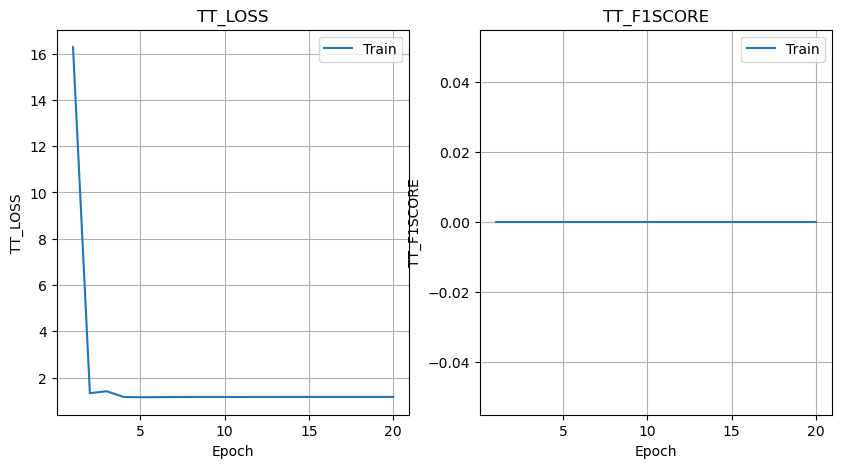

In [20]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].plot(range(1, EPOCHS+1), TT_LOSS['Train'],label='Train')
# axes[0].plot(range(1, EPOCHS+1), TT_LOSS['Test'],label='Test')
axes[0].grid()
axes[0].legend()
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("TT_LOSS")
axes[0].set_title("TT_LOSS")

axes[1].plot(range(1, EPOCHS+1), TT_SCORE['Train'],label='Train')
# axes[1].plot(range(1, EPOCHS+1), TT_SCORE['Test'],label='test')
axes[1].grid()
axes[1].legend()
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("TT_F1SCORE")
axes[1].set_title("TT_F1SCORE")
